In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

In [2]:
data=pd.read_csv('Electric Vehicle Adoption Analysis.csv')
display(data.head())
display(data.info())
display(data.shape)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


None

(12654, 8)

In [3]:
display(data.year.unique())

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2010, 2025, 2030, 2035], dtype=int64)

In [4]:
# Reset the index to make 'region' a regular column
data.reset_index(inplace=True)

In [5]:
display(data.region.unique())

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'EU27', 'Europe',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Rest of the world', 'Romania', 'Seychelles', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Turkiye', 'United Arab Emirates', 'United Kingdom',
       'USA', 'World'], dtype=object)

In [6]:
#Analyzing Electric Vehicle Data
vehicles=data.loc[data['unit']=='Vehicles']
display(vehicles.head())
display(vehicles.shape)
display(vehicles.describe())

,index,region,category,parameter,mode,powertrain,year,unit,value
2,2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
3,3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
4,4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
5,5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
8,8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0


(6842, 9)

,index,year,value
count,6842.000000,6842.000000,6.842000e+03
mean,6262.598802,2019.883221,7.503803e+05
std,3634.485897,5.352174,9.307153e+06
min,2.000000,2010.000000,1.000000e-03
25%,3049.250000,2016.000000,6.725000e+01
50%,6318.500000,2020.000000,1.200000e+03
75%,9429.750000,2022.000000,2.200000e+04
max,12635.000000,2035.000000,4.400000e+08


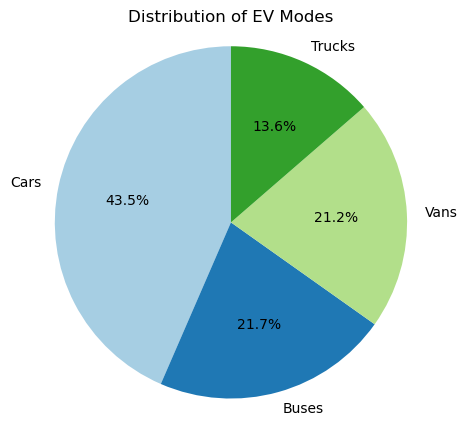

In [52]:
# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of EV Modes')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

In [8]:
min_index=vehicles['value'].idxmin()
min_row=vehicles.loc[min_index]
print(min_row)

index               6151
region            Israel
category      Historical
parameter       EV sales
mode               Buses
powertrain           BEV
year                2013
unit            Vehicles
value              0.001
Name: 6151, dtype: object


In [9]:
max_index=vehicles['value'].idxmax()
max_row=vehicles.loc[max_index]
print(max_row)

index                  12609
region                 World
category      Projection-APS
parameter           EV stock
mode                    Cars
powertrain               BEV
year                    2035
unit                Vehicles
value            440000000.0
Name: 12609, dtype: object


In [10]:
# # Group the data by region and calculate the sum of the 'value' column
vehicles_countries_grouped = vehicles.groupby('region')['value'].sum()

# Convert the Series to a DataFrame
vehicles_countries_df = pd.DataFrame(vehicles_countries_grouped).reset_index()

# Rename the columns for clarity
vehicles_countries_df.columns = ['region', 'total_value']

# Drop the row where the region is 'World'
vehicles_countries_df = vehicles_countries_df[vehicles_countries_df['region'] != 'World']

# Display the DataFrame after dropping the row
print(vehicles_countries_df)

                  region   total_value
0              Australia  5.788320e+05
1                Austria  8.719660e+05
2                Belgium  1.687010e+06
3                 Brazil  2.649470e+05
4               Bulgaria  4.623000e+03
5                 Canada  2.416440e+06
6                  Chile  1.445800e+04
7                  China  1.148052e+09
8               Colombia  1.602300e+04
9             Costa Rica  2.763100e+04
10               Croatia  7.557000e+03
11                Cyprus  2.260000e+03
12        Czech Republic  3.430000e+04
13               Denmark  1.102561e+06
14                  EU27  3.324256e+07
15               Estonia  4.585000e+03
16                Europe  5.937754e+08
17               Finland  7.427230e+05
18                France  6.787772e+06
19               Germany  1.020111e+07
20                Greece  1.053560e+05
21               Hungary  4.203500e+04
22               Iceland  1.897660e+05
23                 India  6.341878e+07
24               Ireland 

In [11]:
#Data Visualization

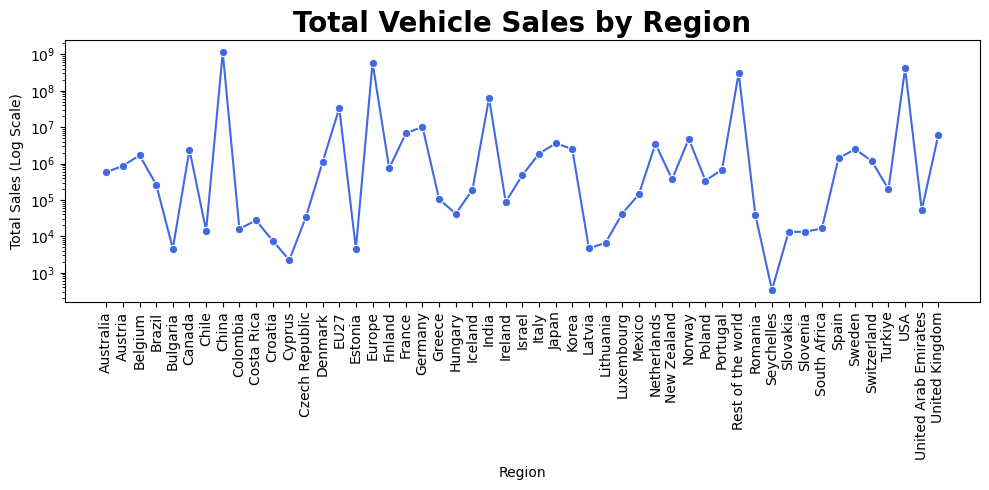

In [12]:
# Plot a line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=vehicles_countries_df, x='region', y='total_value', marker='o', color='royalblue')
plt.title('Total Vehicle Sales by Region', fontsize=20, fontweight='bold')
plt.xlabel('Region', fontsize=10)
plt.ylabel('Total Sales (Log Scale)', fontsize=10)
plt.xticks(rotation=90)
plt.yscale('log')
plt.tight_layout()
plt.show()

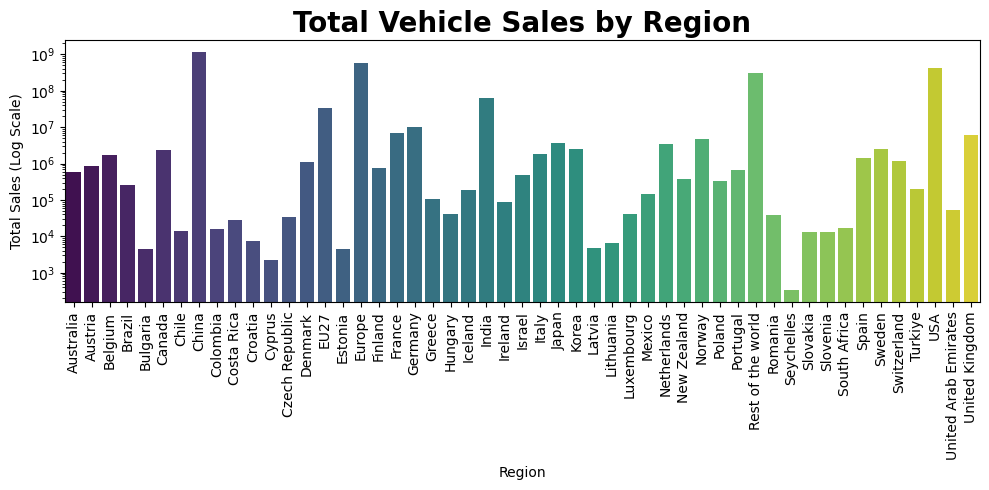

In [13]:
# Create the figure and axis
plt.figure(figsize=(10, 5))
sns.barplot(data=vehicles_countries_df, x='region', y='total_value', hue='region',legend=False, palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Total Vehicle Sales by Region', fontsize=20, fontweight='bold')
plt.xlabel('Region', fontsize=10)
plt.ylabel('Total Sales (Log Scale)', fontsize=10)
# Use logarithmic scale for the y-axis if values span a large range
plt.yscale('log')
plt.tight_layout()
plt.show()

In [14]:
# Get the index of the row with the maximum value in 'total_value'
max_sales_index = vehicles_countries_df['total_value'].idxmax()

# Access the country (region) with the maximum EV sales
best_seller_country = vehicles_countries_df.loc[max_sales_index, 'region']

# Sort the DataFrame by 'total_value' in descending order and select the top 10 countries
top_10_countries = vehicles_countries_df.nlargest(10, 'total_value')

# Display the result
display(top_10_countries[['region', 'total_value']])

,region,total_value
7,China,1.148052e+09
16,Europe,5.937754e+08
48,USA,4.112801e+08
38,Rest of the world,3.089968e+08
23,India,6.341878e+07
14,EU27,3.324256e+07
19,Germany,1.020111e+07
18,France,6.787772e+06
50,United Kingdom,6.283637e+06
35,Norway,4.793634e+06


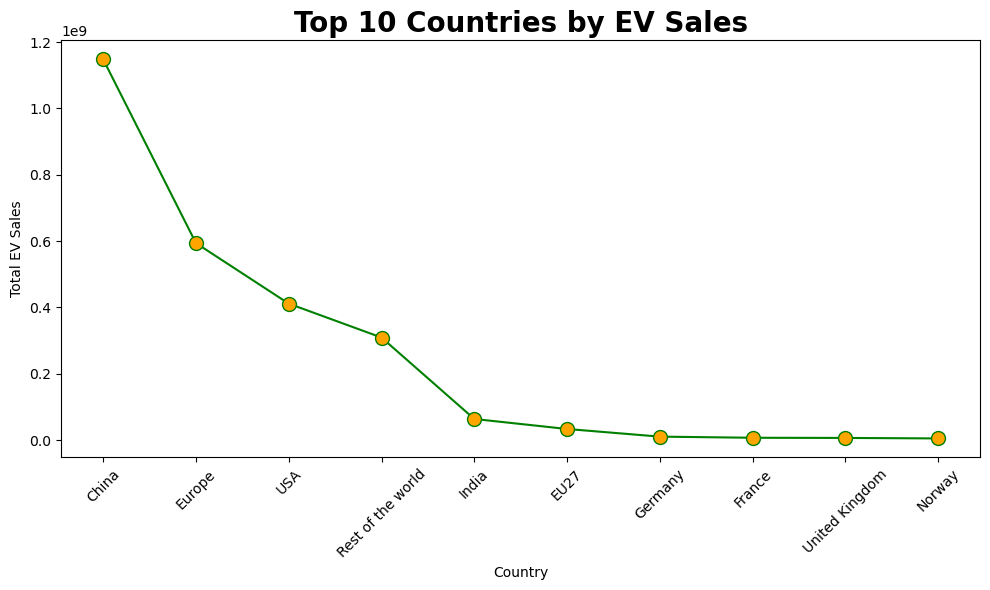

In [15]:
# Set up the plot size and theme
plt.figure(figsize=(10, 6))
# Sort the data to make the line chart look nice
sorted_top_10 = top_10_countries.sort_values('total_value', ascending=False)
plt.plot(sorted_top_10['region'], sorted_top_10['total_value'], marker='o', color='green', markerfacecolor='orange',linestyle='-', markersize=10)
plt.title('Top 10 Countries by EV Sales', fontsize=20,fontweight='bold')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Total EV Sales', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Get the index of the row with the minimum value in 'total_value'
min_sales_index = vehicles_countries_df['total_value'].idxmin()

# Access the country (region) with the minimum EV sales
least_country = vehicles_countries_df.loc[min_sales_index, 'region']

# Sort the DataFrame by 'total_value' in descending order and select the bottom 10 countries
bottom_10_countries = vehicles_countries_df.nsmallest(10, 'total_value')

# Display the result
display(bottom_10_countries[['region', 'total_value']])

,region,total_value
40,Seychelles,338.0
11,Cyprus,2260.0
15,Estonia,4585.0
4,Bulgaria,4623.0
29,Latvia,4687.0
30,Lithuania,6673.0
10,Croatia,7557.0
41,Slovakia,13351.0
42,Slovenia,13363.0
6,Chile,14458.0


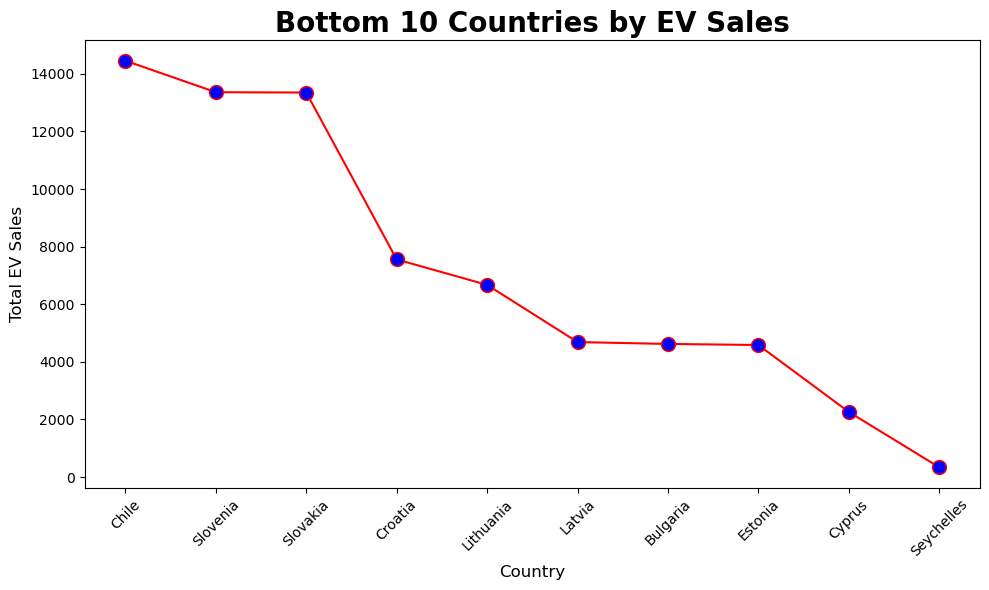

In [17]:
# Set up the plot size and theme
plt.figure(figsize=(10, 6))
# Sort the data to make the line chart look nice
sorted_top_10 = bottom_10_countries.sort_values('total_value', ascending=False)
plt.plot(sorted_top_10['region'], sorted_top_10['total_value'], marker='o', color='red', markerfacecolor='blue', linestyle='-', markersize=10)
plt.title('Bottom 10 Countries by EV Sales', fontsize=20,fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total EV Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Get the top 5 selling countries
top_5_countries = vehicles_countries_df.nlargest(5, 'total_value')

# Get the bottom 5 selling countries
bottom_5_countries = vehicles_countries_df.nsmallest(5, 'total_value')

# Concatenate the top 5 and bottom 5 countries into a new DataFrame
top_and_bottom_countries = pd.concat([top_5_countries, bottom_5_countries])

# Display the result
display(top_and_bottom_countries[['region', 'total_value']])

,region,total_value
7,China,1.148052e+09
16,Europe,5.937754e+08
48,USA,4.112801e+08
38,Rest of the world,3.089968e+08
23,India,6.341878e+07
40,Seychelles,3.380000e+02
11,Cyprus,2.260000e+03
15,Estonia,4.585000e+03
4,Bulgaria,4.623000e+03
29,Latvia,4.687000e+03


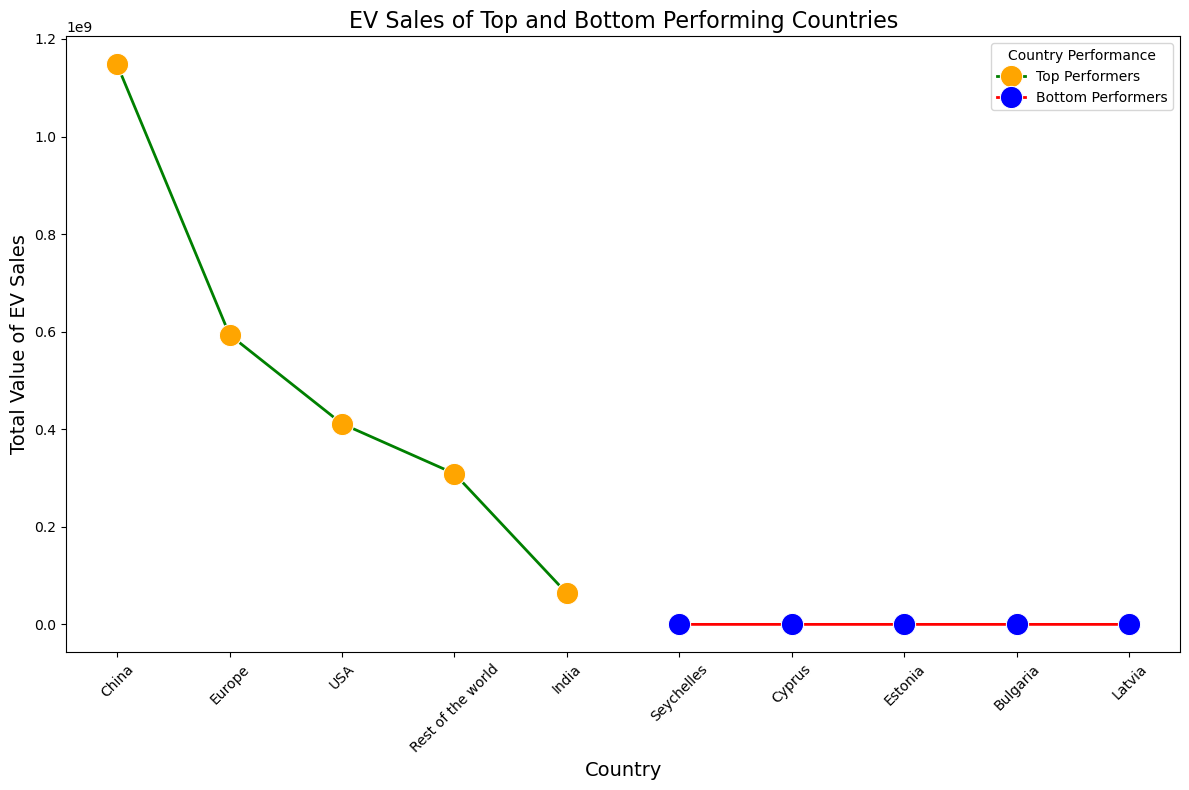

In [19]:
# Separate top and bottom countries
top_countries = top_and_bottom_countries.iloc[:5]
bottom_countries = top_and_bottom_countries.iloc[5:]
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_countries, x='region', y='total_value', marker='o', color='green', markerfacecolor='orange', markersize=16, label='Top Performers', linewidth=2)
sns.lineplot(data=bottom_countries, x='region', y='total_value', marker='o', color='red', markerfacecolor='blue', markersize=16, label='Bottom Performers', linewidth=2)
plt.title('EV Sales of Top and Bottom Performing Countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Value of EV Sales', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Country Performance')
plt.tight_layout()
plt.show()

In [20]:
# Current dataframe, but we drop 'World'
vehicles_countries_df = pd.DataFrame({
    'region': ['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 
               'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'EU27', 'Estonia', 'Europe', 
               'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Ireland', 'Israel', 
               'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 
               'New Zealand', 'Norway', 'Poland', 'Portugal', 'Rest of the world', 'Romania', 'Seychelles', 
               'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkiye', 'USA', 
               'United Arab Emirates', 'United Kingdom'],
    'total_value': [578832, 871966, 1687010, 264947, 4623, 2416440, 14458, 1148052000, 16023, 27631, 7557, 
                    2260, 34300, 1102561, 33242560, 4585, 593775400, 742723, 6787772, 10201110, 105356, 
                    42035, 189766, 63418780, 88570, 482187, 1860044, 3603756, 2516838, 4687, 6673, 42100, 
                    142591, 3488004, 371462, 4793634, 343287, 674996, 308996800, 39488, 338, 13351, 13363, 
                    16533, 1403419, 2509214, 1165185, 198338, 411280100, 52804, 6283637]
})

# Manually map each country/region to its continent
continent_map = {
    'Australia': 'Oceania', 'Austria': 'Europe', 'Belgium': 'Europe', 'Brazil': 'South America',
    'Bulgaria': 'Europe', 'Canada': 'North America', 'Chile': 'South America', 'China': 'Asia', 
    'Colombia': 'South America', 'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cyprus': 'Europe',
    'Czech Republic': 'Europe', 'Denmark': 'Europe', 'EU27': 'Europe', 'Estonia': 'Europe', 'Europe': 'Europe', 
    'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'India': 'Asia', 'Ireland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe',
    'Japan': 'Asia', 'Korea': 'Asia', 'Latvia': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Mexico': 'North America', 'Netherlands': 'Europe', 'New Zealand': 'Oceania', 'Norway': 'Europe',
    'Poland': 'Europe', 'Portugal': 'Europe', 'Rest of the world': 'Other', 'Romania': 'Europe', 
    'Seychelles': 'Africa', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 'South Africa': 'Africa', 
    'Spain': 'Europe', 'Sweden': 'Europe', 'Switzerland': 'Europe', 'Turkiye': 'Europe', 'USA': 'North America', 
    'United Arab Emirates': 'Asia', 'United Kingdom': 'Europe'
}

# Add a 'continent' column to the dataframe
vehicles_countries_df['continent'] = vehicles_countries_df['region'].map(continent_map)

# Group by 'continent' and sum the total_value
continent_totals = vehicles_countries_df.groupby('continent')['total_value'].sum().reset_index()

# Rename columns for clarity
continent_totals.columns = ['continent', 'total_sales']

# Display the result
print(continent_totals)


       continent  total_sales
0         Africa        16871
1           Asia   1218126365
2         Europe    671729574
3  North America    413866762
4        Oceania       950294
5          Other    308996800
6  South America       295428


In [21]:
# Filter the original dataframe for regions categorized as 'Other'
other_countries = vehicles_countries_df[vehicles_countries_df['continent'] == 'Other']

# Display the result
display(other_countries[['region', 'total_value']])

,region,total_value
38,Rest of the world,308996800


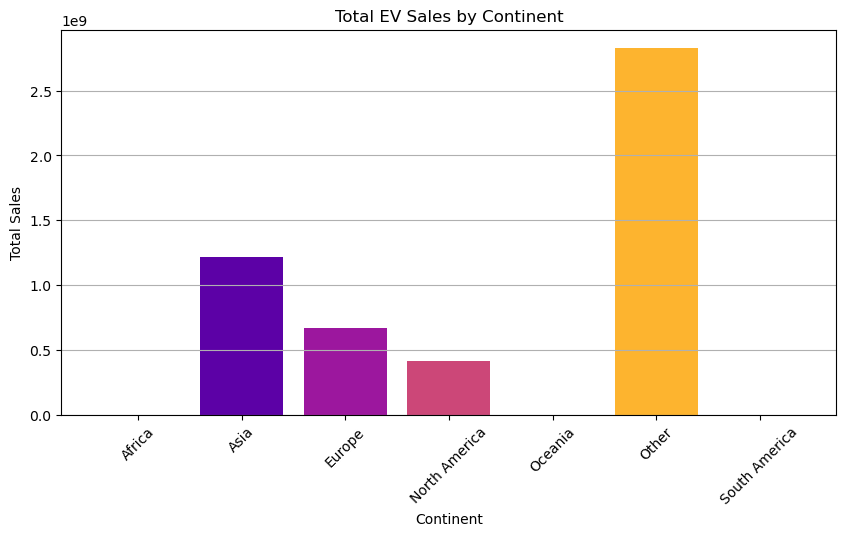

In [22]:
# Data
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'Other', 'South America']
sales = [16871, 1218126365, 671729574, 413866762, 950294, 2829116800, 295428]

# Create a color map
colors = plt.cm.plasma(np.linspace(0, 1, len(continents)))

# Create bar plot
plt.figure(figsize=(10, 5))
plt.bar(continents, sales, color=colors)  # Use the colors generated from the color map
plt.title('Total EV Sales by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [23]:
# Sample coordinates for the center of the map
map_center = [20, 0]  # Adjust to center the map
m = folium.Map(location=map_center, zoom_start=2)

# Sample data - replace this with your actual continent totals and coordinates
continent_data = {
    'Africa': {'total_sales': 16871, 'coords': [1.0, 20.0]},  # Sample coordinates
    'Asia': {'total_sales': 1218126365, 'coords': [34.0, 100.0]},
    'Europe': {'total_sales': 671729574, 'coords': [48.0, 10.0]},
    'North America': {'total_sales': 413866762, 'coords': [37.0, -95.0]},
    'Oceania': {'total_sales': 950294, 'coords': [-25.0, 135.0]},
    'South America': {'total_sales': 295428, 'coords': [-15.0, -60.0]},
    'Other': {'total_sales': 2829116800, 'coords': [0.0, 0.0]}  # Dummy location
}

# Prepare data for heatmap and clustering
heat_data = []
marker_cluster = MarkerCluster().add_to(m)

# Add markers and prepare data for the heatmap
for continent, info in continent_data.items():
    # Marker for clustering
    folium.Marker(
        location=info['coords'],
        popup=f"{continent}: {info['total_sales']}",
        icon=folium.Icon(color='blue' if continent != 'Other' else 'red')
    ).add_to(marker_cluster)
    
    # Add to heatmap data
    heat_data.append(info['coords'] + [info['total_sales']])  # Adding sales value as weight

# Create heatmap
heatmap = HeatMap(heat_data, name='Sales Heatmap', radius=20).add_to(m)

# Add Layer Control
folium.LayerControl().add_to(m)

# Display the map
m

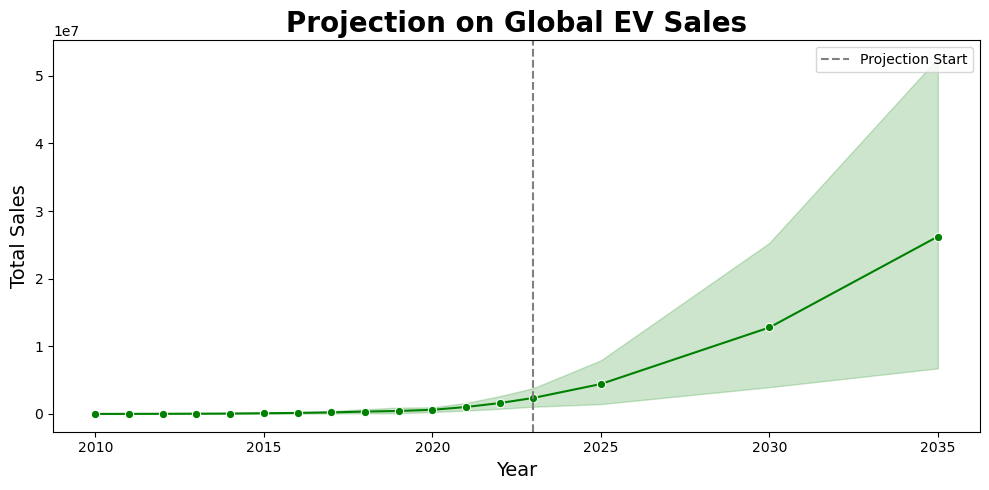

In [24]:
# Filter the World data
world_data = vehicles[vehicles['region'] == 'World']

plt.figure(figsize=(10, 5))
sns.lineplot(data=world_data, x='year', y='value', marker='o', color='green')
plt.title('Projection on Global EV Sales', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
# Highlight historical vs projection with different line styles
plt.axvline(x=2023, color='gray', linestyle='--', label='Projection Start')  # Assuming projection starts after 2023
plt.legend()
plt.tight_layout()
plt.show()
